# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [9]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [10]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (1.8693615829245764, 0.39271120229479917)
1     (1.0851427961636386, 0.5812516995767594)
2     (2.4381548266006465, 0.2955026680329824)
3      (4.16874459308056, 0.12438517266952577)
4     (1.0725557246906263, 0.5849213633876077)
dtype: object

#### Interpret the normaltest results and make your observations.

### Explain the test results here
#### We reject the null hypothesis because the pvalue is much higher than 0,05. Also, the stats numbers are way higher than 0 because the farther to 0, the farther to the mean. We can conclude that dependently of the sample size, it has no correlation. It's not a normal distribution. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

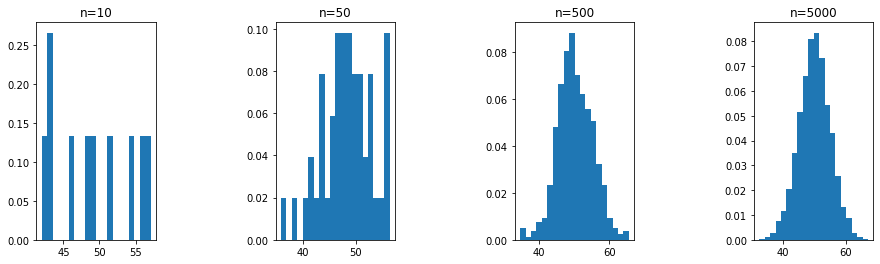

In [12]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

### Your comment and explanation here: 
#### The higher the sample the more correlation between plots


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

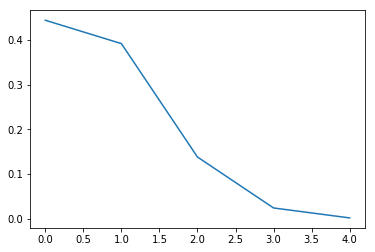

In [114]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

## Your comment here
#### There is less probability that all visitors click the add that one visitor clicks. 

#### Now plot PMP with 50, 500, and 5000 visitors.

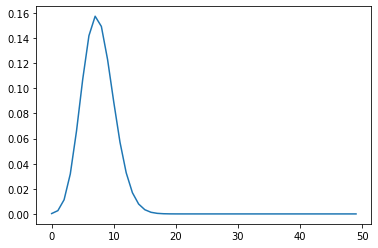

In [21]:
# Your code here
from scipy.stats import binom

n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

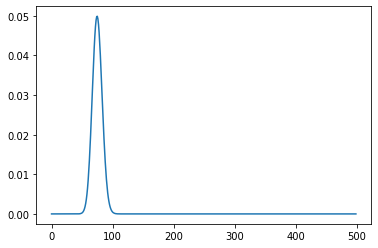

In [14]:
from scipy.stats import binom

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

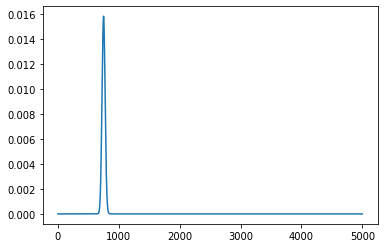

In [15]:
from scipy.stats import binom

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

## Your comment here
#### The bigger the sample, the less probability exists of someone clicking the Ad

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

### Your comment here
#####  Poission distribution describes the probability of a certain number of events happening within a defined period based on a "rate".

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [25]:
# Your code here

poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [26]:
# Your code here
poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

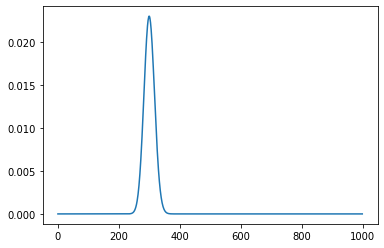

In [27]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)